

```
# Ce texte est au format code
```

# TP5 Supervised learning: Regression problem

In [121]:
%pip install scikit-optimize
%pip install pandas
%pip insall numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "insall" - maybe you meant "install"



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
     ---------------------------------------- 0.3/72.0 MB 8.0 MB/s eta 0:00:09
     ---------------------------------------- 0.8/72.0 MB 10.1 MB/s eta 0:00:08
      --------------------------------------- 1.4/72.0 MB 11.0 MB/s eta 0:00:07
     - -------------------------------------- 2.0/72.0 MB 11.7 MB/s eta 0:00:06
     - -------------------------------------- 2.6/72.0 MB 11.9 MB/s eta 0:00:06
     - -------------------------------------- 3.2/72.0 MB 12.2 MB/s eta 0:00:06
     -- ------------------------------------- 4.1/72.0 MB 12.9 MB/s eta 0:00:06
     -- ------------------------------------- 4.7/72.0 MB 12.9 MB/s eta 0:00:06
     --- ------------------------------------ 5.4/72.0 MB 12.9 MB/s eta 0:00:06
     --- ------------------------------------ 6.2/72.0 MB 13.2 MB/s eta 0:00:05
     --- ------------------------------------ 6.9/72.0 MB 13.8 MB/s eta 0:00:05
     ---- ----------------------------------- 7.6


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import warnings
warnings.filterwarnings('ignore')

### Part 1: Descriptive statistics and preprocessing

Let's first import all the libraries that will need.

In [91]:
import pandas as pd 
import numpy as np

1) Load _*train.csv*_ and _*test.csv*_ datasets, print their shapes, display the first few rows, and provide a summary with [pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) for each dataset.

In [92]:
# Answer
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

print("Train data shape:", train_data.shape)
print("Test data shape:" , test_data.shape)


Train data shape: (1000, 38)
Test data shape: (460, 38)


The train dataset contains __1000 samples and 38 features__, while the test dataset contains __460 samples and 38__ features. They both have the __same number of features__, which is expected since they are likely to be used for training and evaluating a machine learning model.

Let's display the first 10 records for both dataset

In [93]:
print("\nFirst 10 rows of Train data:")
train_data.head(10)



First 10 rows of Train data:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


In [94]:
print("\nFirst 10 rows of Test data:")
test_data.head(10)


First 10 rows of Test data:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1001,20,74.0,10206,3,3,1952,1952,0.0,0,...,0,0,0,0,0,0,0,7,2009,82000
1,1002,30,60.0,5400,5,6,1920,1950,0.0,0,...,0,20,94,0,0,0,0,1,2007,86000
2,1003,20,75.0,11957,8,5,2006,2006,53.0,24,...,144,104,0,0,0,0,0,7,2008,232000
3,1004,90,NaN,11500,5,6,1976,1976,164.0,0,...,0,0,0,0,0,0,0,6,2007,136905
4,1005,120,43.0,3182,7,5,2005,2006,16.0,16,...,156,0,0,0,0,0,0,5,2009,181000
5,1006,80,65.0,8385,5,8,1977,1977,220.0,595,...,210,0,0,0,0,0,0,11,2008,149900
6,1007,20,NaN,12155,6,3,1970,1970,0.0,1237,...,0,0,0,0,147,0,0,3,2007,163500
7,1008,160,21.0,2217,4,4,1970,1970,0.0,273,...,238,0,0,0,0,0,0,8,2009,88000
8,1009,20,43.0,12118,7,5,2004,2005,108.0,0,...,100,48,0,0,180,0,0,4,2009,240000
9,1010,50,60.0,6000,5,5,1926,1950,0.0,0,...,0,0,138,0,0,0,0,6,2006,102000


2) Extract ```SalePrice``` as the target variable from the ```train``` and ```test``` datasets, storing them as ```train_target``` and ```test_target``` respectively. Remove unnecessary variables from the same datasets.

In [95]:
# Answer : Train target variable 'SalePrice'
train_target = train_data['SalePrice']
print("\nTrain target variable 'SalePrice':")
train_target


Train target variable 'SalePrice':


0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
995    121600
996    136500
997    185000
998     91000
999    206000
Name: SalePrice, Length: 1000, dtype: int64

In [96]:
# Answer : Test target variable 'SalePrice'
test_target = test_data['SalePrice']
print("\nTest target variable 'SalePrice':")
test_target


Test target variable 'SalePrice':


0       82000
1       86000
2      232000
3      136905
4      181000
        ...  
455    175000
456    210000
457    266500
458    142125
459    147500
Name: SalePrice, Length: 460, dtype: int64

3) Define a function that identifies variables with missing values, and returns each variable's name, the number of missing values, and the percentage of missing values.

In [97]:
# Answer
import pandas as pd

def detect_missing_values(df : pd.DataFrame) -> pd.DataFrame:
    """
    Identify variables (columns) with missing values.
    Returns a DataFrame with:
      - variable name
      - number of missing values
      - percentage of missing values
    """
    missing = df.isnull().sum()
    missing = missing[missing > 0]  # keep only columns with missing values

    if missing.empty:
        print("No missing values found.")
        return pd.DataFrame(columns=['variable', 'missing_count', 'missing_percent'])

    missing_percent = 100 * missing / len(df)
    result = pd.DataFrame({
        'variable': missing.index,
        'missing_count': missing.values,
        'missing_percent': missing_percent.values
    }).sort_values(by='missing_percent', ascending=False).reset_index(drop=True)

    return result

print("Missing values in Train data:")
missing_train = detect_missing_values(train_data)
print(missing_train)		
print("\nMissing values in Test data:")
missing_test = detect_missing_values(test_data)
print(missing_test)

Missing values in Train data:
      variable  missing_count  missing_percent
0  LotFrontage            173             17.3
1  GarageYrBlt             56              5.6
2   MasVnrArea              6              0.6

Missing values in Test data:
      variable  missing_count  missing_percent
0  LotFrontage             86        18.695652
1  GarageYrBlt             25         5.434783
2   MasVnrArea              2         0.434783


4) For simplicity, fill the missing values with 0 using [pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) (modify the same dataset).

In [98]:
# Answer
def fill_missing_values_with_zero(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handle missing values in numerical columns by filling with 0 (vectorized)
    """
    num_cols = df.select_dtypes(include=[np.number]).columns
    df[num_cols] = df[num_cols].fillna(0)  # vectorized
    
    return df

In [99]:
# Test the function
train_data_filled = fill_missing_values_with_zero(train_data)
test_data_filled = fill_missing_values_with_zero(test_data)
print("Missing values after filling in Train data:")
print(detect_missing_values(train_data_filled))	
print("Missing values after filling in Test data:")
print(detect_missing_values(test_data_filled))

Missing values after filling in Train data:
No missing values found.
Empty DataFrame
Columns: [variable, missing_count, missing_percent]
Index: []
Missing values after filling in Test data:
No missing values found.
Empty DataFrame
Columns: [variable, missing_count, missing_percent]
Index: []


5) Describe the target variable ```train_target```

In [100]:
# Answer
train_target.describe()

count      1000.000000
mean     182284.451000
std       80291.215207
min       34900.000000
25%      130000.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Results interpretation 
* This gives summary statistics of your target variable (SalePrice) in the training dataset.
* The description shows that there are __1000__ samples which match the number of records in the training set. 
* The __average SalePrice is 182284.45__.
* The __standard deviation is 80291.21__ It measures how spread out the prices are around the mean ,.
* The __minimum SalePrice is 34900.00__.
* The __maximum SalePrice is 755000.00__.
* The __first quartile is 130000.00__. 25% of the houses are below 130,000.
* The __second quartile (median) is 163995.00__.The middle value: half the houses are below this price, half above.
* The __third quartile is 215000.00__. 75% of the houses are below 215,000.


6) Plot the histogram and density of ```train_target``` (you can use [seaborn.displot](https://seaborn.pydata.org/generated/seaborn.displot.html) module)

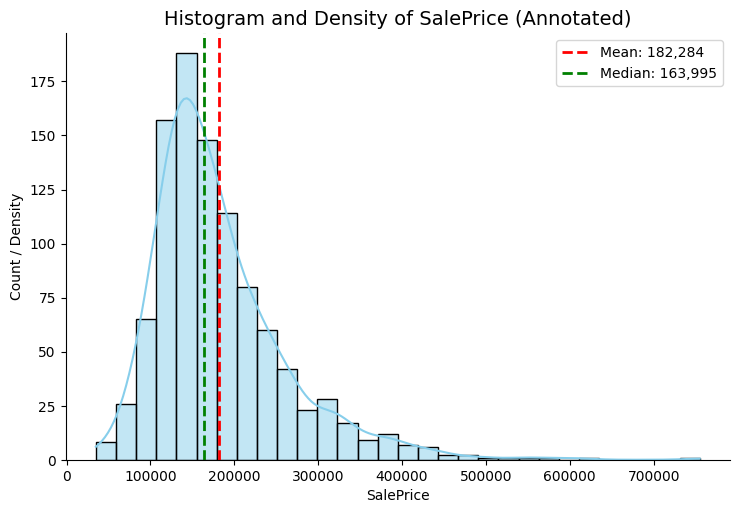

In [101]:
# Answer

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot histogram + density
# sns.displot(train_target, kde=True, bins=30, height=5, aspect=1.5)

# # Add title and labels
# plt.title("Histogram and Density of SalePrice")
# plt.xlabel("SalePrice")
# plt.ylabel("Count / Density")
# plt.show()

# # train_target.hist(bins=30, edgecolor='black')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming train_target already exists
sns.displot(train_target, kde=True, bins=30, height=5, aspect=1.5, color="skyblue")
plt.title("Histogram and Density of SalePrice (Annotated)", fontsize=14)
plt.xlabel("SalePrice")
plt.ylabel("Count / Density")

# Mean, median, skew annotation
mean_val = train_target.mean()
median_val = train_target.median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:,.0f}")
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:,.0f}")

plt.legend()
plt.show()


7) Plot histograms of all other variables using [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)

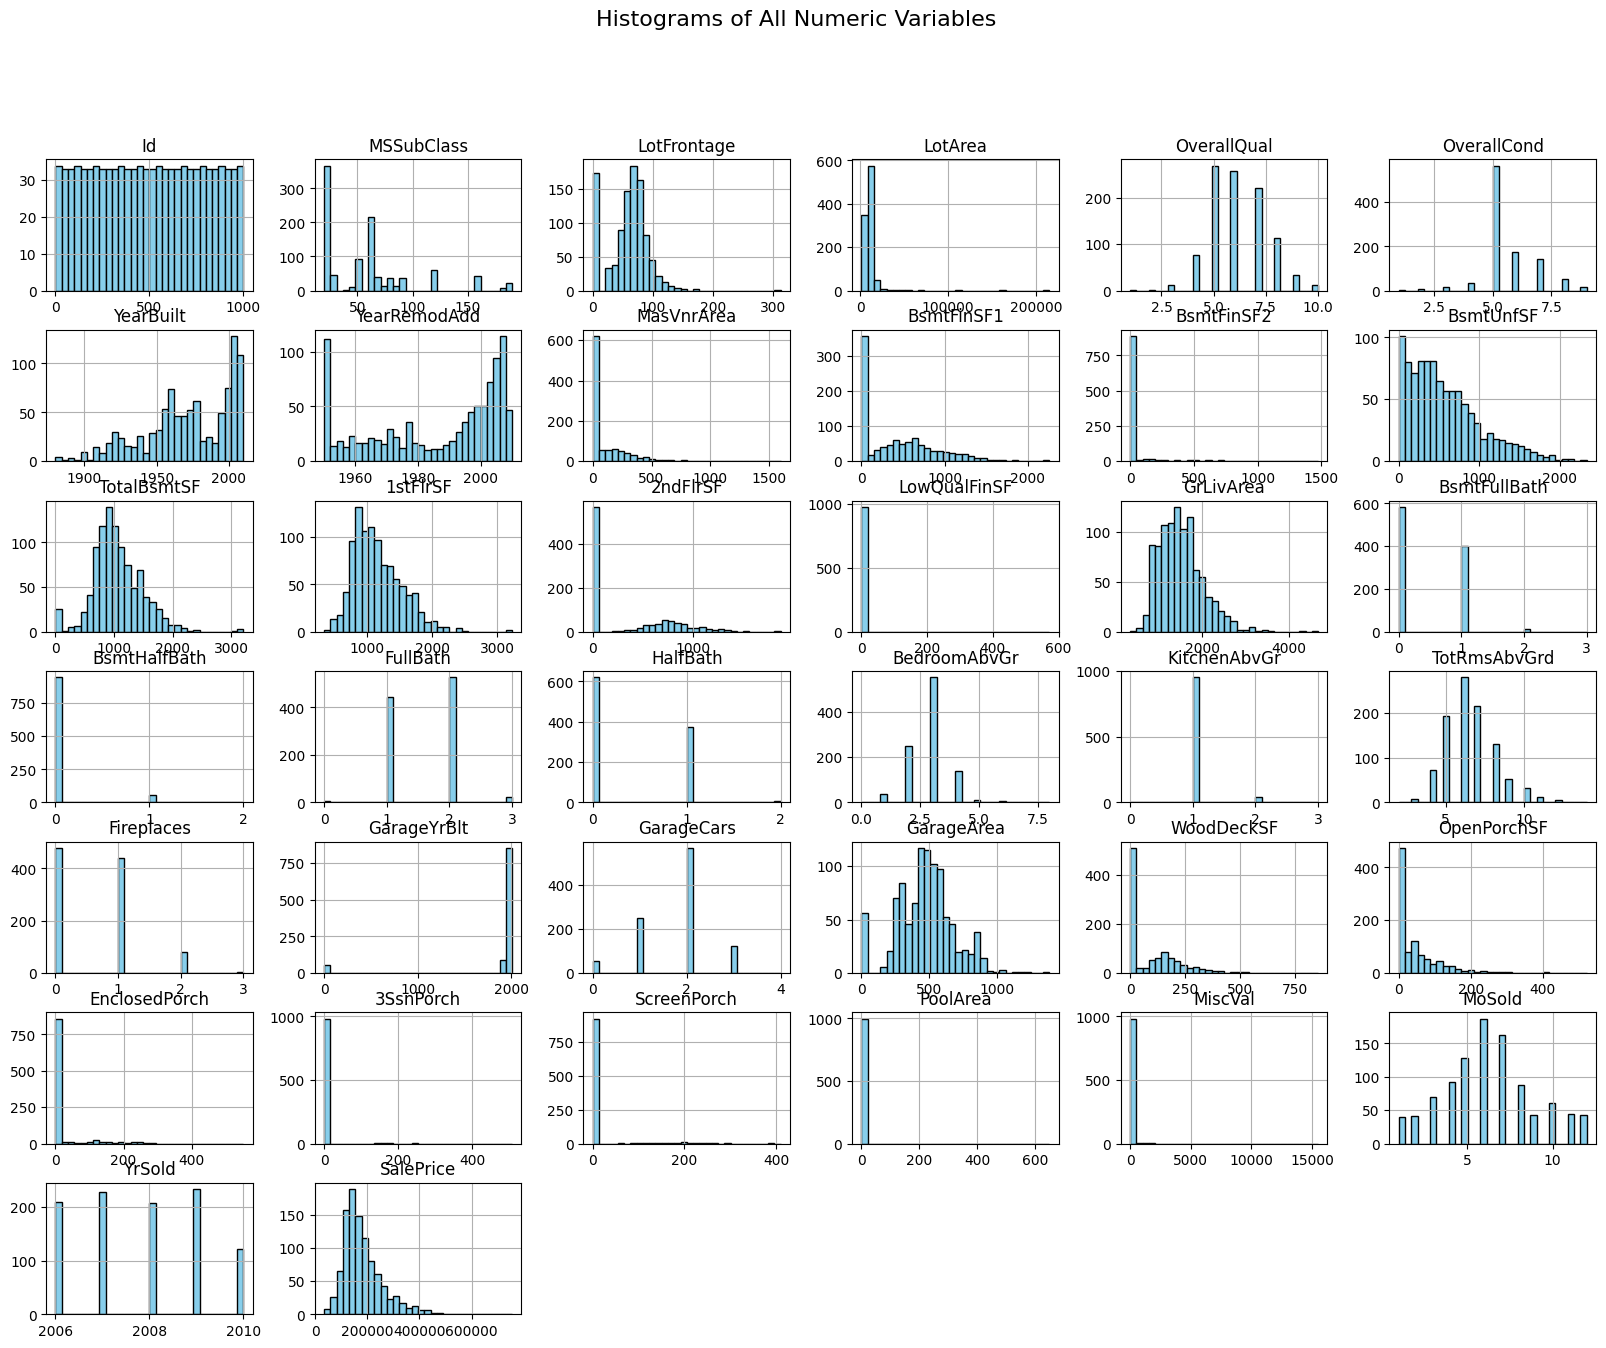

In [102]:
# Answer
import matplotlib.pyplot as plt

# Assuming your training dataset is called train_data
train_data.hist(
    bins=30, 
    figsize=(20, 15), 
    color='skyblue', 
    edgecolor='black'
)
plt.suptitle("Histograms of All Numeric Variables", fontsize=16)
plt.show()

8) Compute and plot the correlation matrix between the variables using [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html). Comment the results.

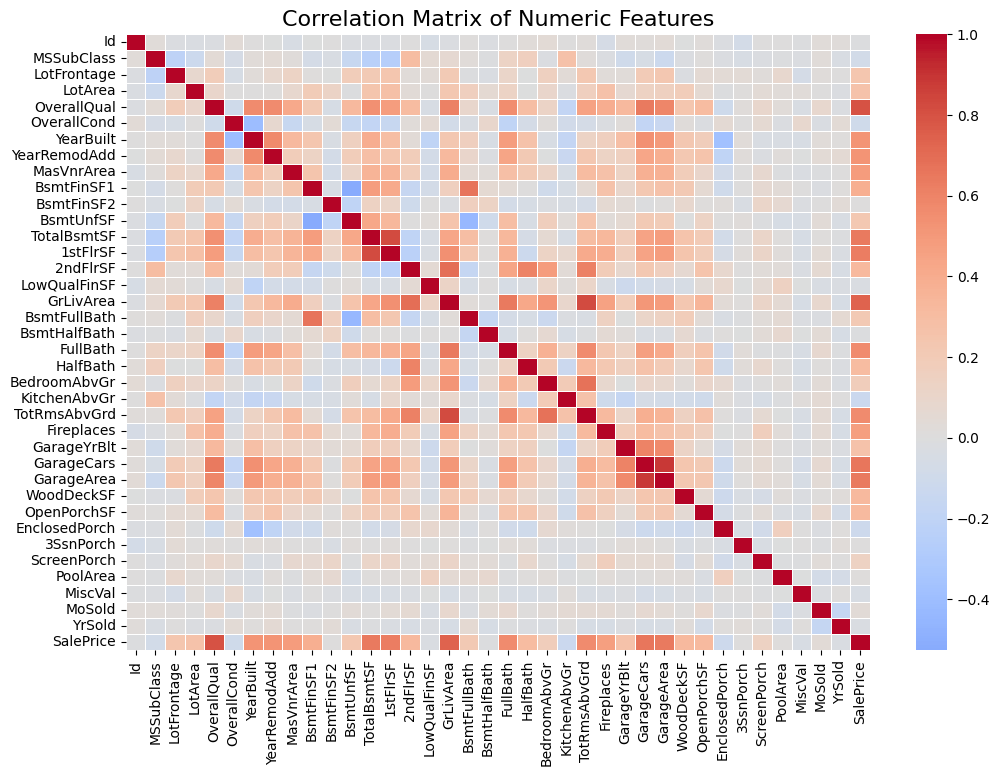

SalePrice        1.000000
OverallQual      0.797666
GrLivArea        0.734997
GarageCars       0.658204
GarageArea       0.647953
TotalBsmtSF      0.642127
1stFlrSF         0.627749
TotRmsAbvGrd     0.570375
FullBath         0.559980
YearBuilt        0.527193
YearRemodAdd     0.526195
MasVnrArea       0.491609
Fireplaces       0.473011
BsmtFinSF1       0.389868
2ndFlrSF         0.325329
WoodDeckSF       0.324953
OpenPorchSF      0.319551
HalfBath         0.304008
GarageYrBlt      0.266615
LotArea          0.265493
LotFrontage      0.237649
BsmtUnfSF        0.221219
BsmtFullBath     0.216566
BedroomAbvGr     0.173287
ScreenPorch      0.140744
MoSold           0.039314
PoolArea         0.012493
3SsnPorch        0.009682
BsmtFinSF2       0.000359
BsmtHalfBath    -0.009389
Id              -0.009525
LowQualFinSF    -0.028580
YrSold          -0.030562
MiscVal         -0.039521
MSSubClass      -0.081252
OverallCond     -0.095816
EnclosedPorch   -0.111712
KitchenAbvGr    -0.132654
Name: SalePr

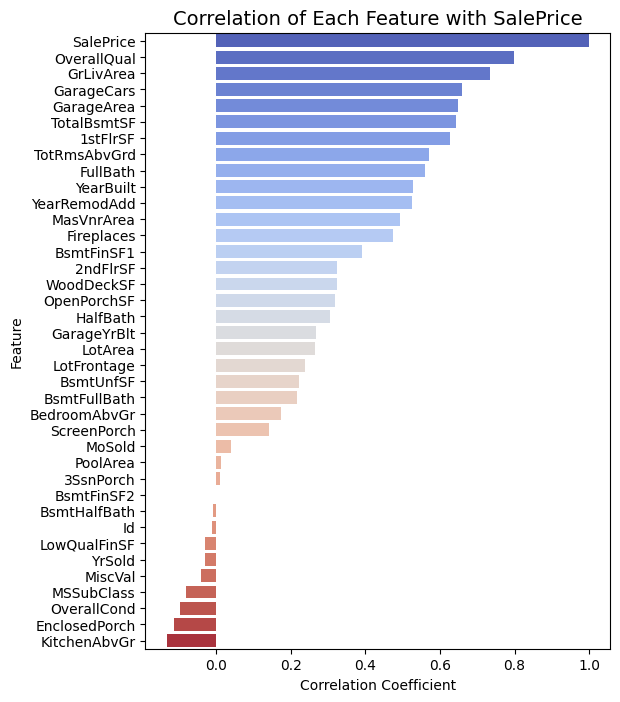

In [103]:
# Answer

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric variables
corr_matrix = train_data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=False,          # set True to show numeric values inside each cell
    cmap='coolwarm',      # blue = negative corr, red = positive corr
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()


# Correlation of each feature with SalePrice
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_target)


plt.figure(figsize=(6, 8))
sns.barplot(
    y=corr_with_target.index, 
    x=corr_with_target.values, 
    palette='coolwarm'
)
plt.title("Correlation of Each Feature with SalePrice", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()



#### COMMENT 

1) Strongly Correlated Variables (r > 0.6)

* OverallQual (0.80) – This is the variable most strongly correlated with price. The overall material and finish quality of the house has a major impact on its market value.

* GrLivArea (0.73) – The above-ground living area has a strong positive relationship with price; larger homes are generally more expensive.

* GarageCars (0.66) and GarageArea (0.65) – Both the number of garage spaces and the total garage area are good indicators of house price.

* TotalBsmtSF (0.64) and 1stFlrSF (0.63) – Larger basement and first-floor areas contribute positively to the property’s value.
  
  
👉These features mainly reflect size and quality, the two most important factors determining real estate value.
  
2) Moderately Correlated Variables (0.3 ≤ r ≤ 0.6)

* TotRmsAbvGrd (0.57) and FullBath (0.56) – More rooms and bathrooms are typically associated with higher sale prices.

* YearBuilt (0.53) and YearRemodAdd (0.53) – Newer or recently renovated houses tend to sell for higher prices.

* MasVnrArea (0.49) and Fireplaces (0.47) – Exterior finishes (like stone or brick) and the presence of fireplaces add value.

* BsmtFinSF1 (0.39) and 2ndFlrSF (0.33) – Additional finished areas, such as a second floor or finished basement, increase the price.

👉  These variables relate to modernity, comfort, and usable space.
  
3) Weakly Correlated Variables (0.1 ≤ r < 0.3)

* LotArea and LotFrontage (≈ 0.24–0.27) – The total lot size plays a role, but less significant than the living area.

* WoodDeckSF, OpenPorchSF, and HalfBath (≈ 0.3) – Outdoor amenities and additional features moderately influence price.

* BedroomAbvGr (0.17) – The number of bedrooms alone is not a strong indicator, as it’s often offset by total house size.

👉 These variables represent secondary features that contribute less to price variation.

4)  Negatively Correlated Variables

* OverallCond (-0.10) – Houses in poorer condition tend to sell for lower prices.

* KitchenAbvGr (-0.13) and EnclosedPorch (-0.11) – These features are more common in older or less valuable homes.

* MSSubClass (-0.08) – Lower building subclasses (often older styles) are associated with lower prices.

👉 These variables indicate depreciation factors or outdated structural styles.

SUMMARY: 

* The most important predictors of sale price are:
* OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, and 1stFlrSF.

* Some variables are redundant with each other (e.g., GarageCars and GarageArea are highly correlated).

* Weakly or negatively correlated variables may be dropped or transformed depending on the modeling approach.

9) Visualize correlations between ```SalePrice``` and other variables using a [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html).

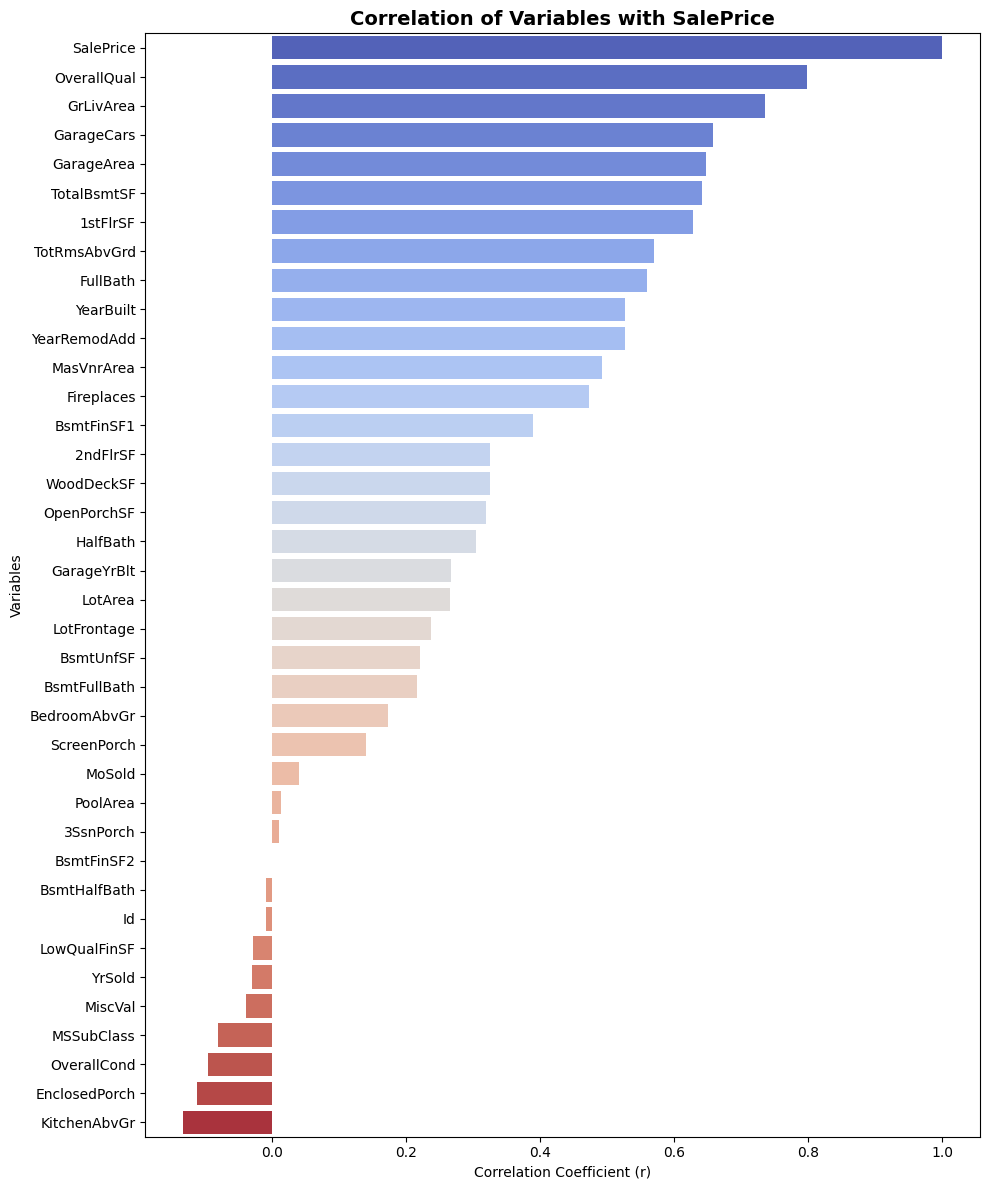

In [104]:
# Answer

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
corr = train_data.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

# Convert to DataFrame for easier plotting
corr_df = corr.reset_index()
corr_df.columns = ["Variable", "Correlation"]

# Plot
plt.figure(figsize=(10, 12))
sns.barplot(
    data=corr_df,
    y="Variable",
    x="Correlation",
    palette="coolwarm",
    orient="h"
)
plt.title("Correlation of Variables with SalePrice", fontsize=14, fontweight='bold')
plt.xlabel("Correlation Coefficient (r)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()



10) Visualize the scatter plot of the ```SalePrice``` variable as a function of the ```GrLivArea```. Comment.

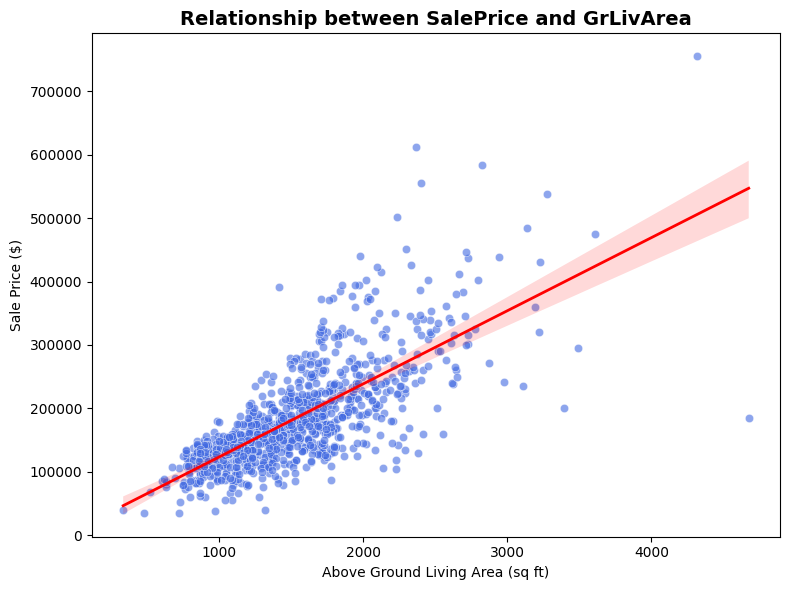

In [105]:
# Answer
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=train_data,
    x="GrLivArea",
    y="SalePrice",
    alpha=0.6,
    color="royalblue",
    edgecolor="w"
)

# Optional: add a regression line
sns.regplot(
    data=train_data,
    x="GrLivArea",
    y="SalePrice",
    scatter=False,
    color="red",
    line_kws={"linewidth": 2}
)

plt.title("Relationship between SalePrice and GrLivArea", fontsize=14, fontweight="bold")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price ($)")
plt.tight_layout()
plt.show()



### Comment / Interpretation


* There is a strong positive linear relationship between GrLivArea (above-ground living area) and SalePrice.
→ As the living area increases, the house price tends to increase as well.

* The correlation coefficient (≈ 0.73) confirms this strong association.

* However, some outliers may appear:

* A few houses with large living areas but relatively low prices, possibly due to poor quality, location, or condition.

* These outliers could distort model performance if not handled (e.g., by removing or capping them).

* The linear trend suggests GrLivArea is an excellent predictor variable for regression models targeting SalePrice.

11) Visualize the boxplot of the ```SalePrice``` variable as a function of the ```OverallQual``` using [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html). Interpret the boxplot

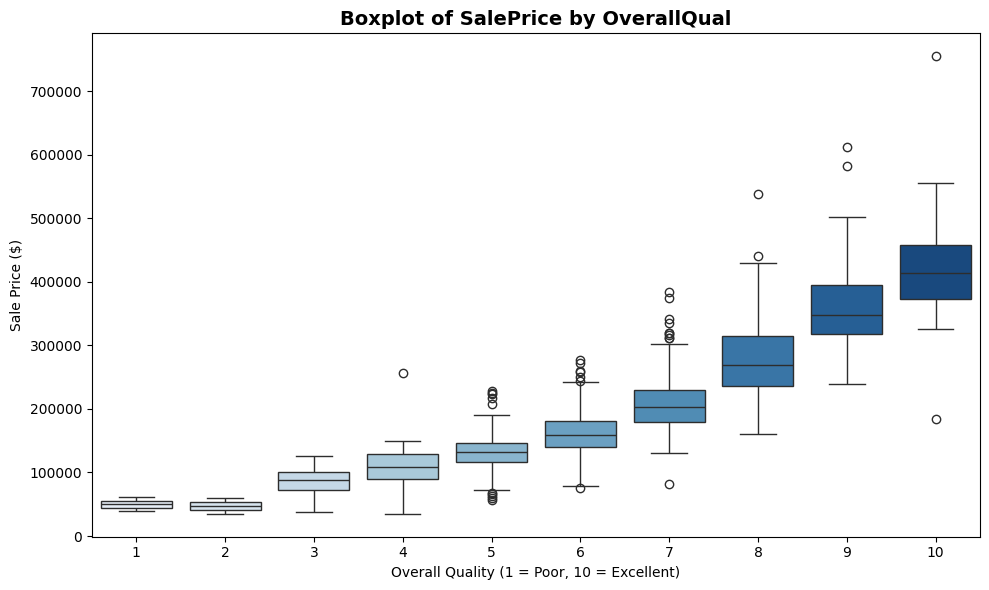

In [106]:
# Answer
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(
    data=train_data,
    x="OverallQual",
    y="SalePrice",
    palette="Blues",
    showfliers=True
)

plt.title("Boxplot of SalePrice by OverallQual", fontsize=14, fontweight="bold")
plt.xlabel("Overall Quality (1 = Poor, 10 = Excellent)")
plt.ylabel("Sale Price ($)")
plt.tight_layout()
plt.show()


### Interpretation

* The boxplot clearly shows a positive relationship between OverallQual (overall material and finish quality) and SalePrice.
→ Houses with higher quality ratings tend to have higher sale prices.

* Median SalePrice increases sharply with OverallQual:

* Homes rated 8–10 have significantly higher median prices.

* Homes rated 4–6 are in the mid-range.

* Homes rated 1–3 correspond to low-value properties.

* The interquartile range (IQR) also widens for higher quality levels, meaning:

* High-quality homes have greater price variability — likely due to differences in size, location, and luxury features.

* Outliers appear in almost all categories, especially at high quality levels.
→ These likely correspond to exceptionally expensive properties or luxury houses.

__Conclusion__

The OverallQual variable has a strong and clear effect on house prices.
It is one of the most influential predictors of SalePrice and should definitely be included in any predictive model.

12) Visualize the empirical distributions of the train and test dataset (for some variables). Comment the results.

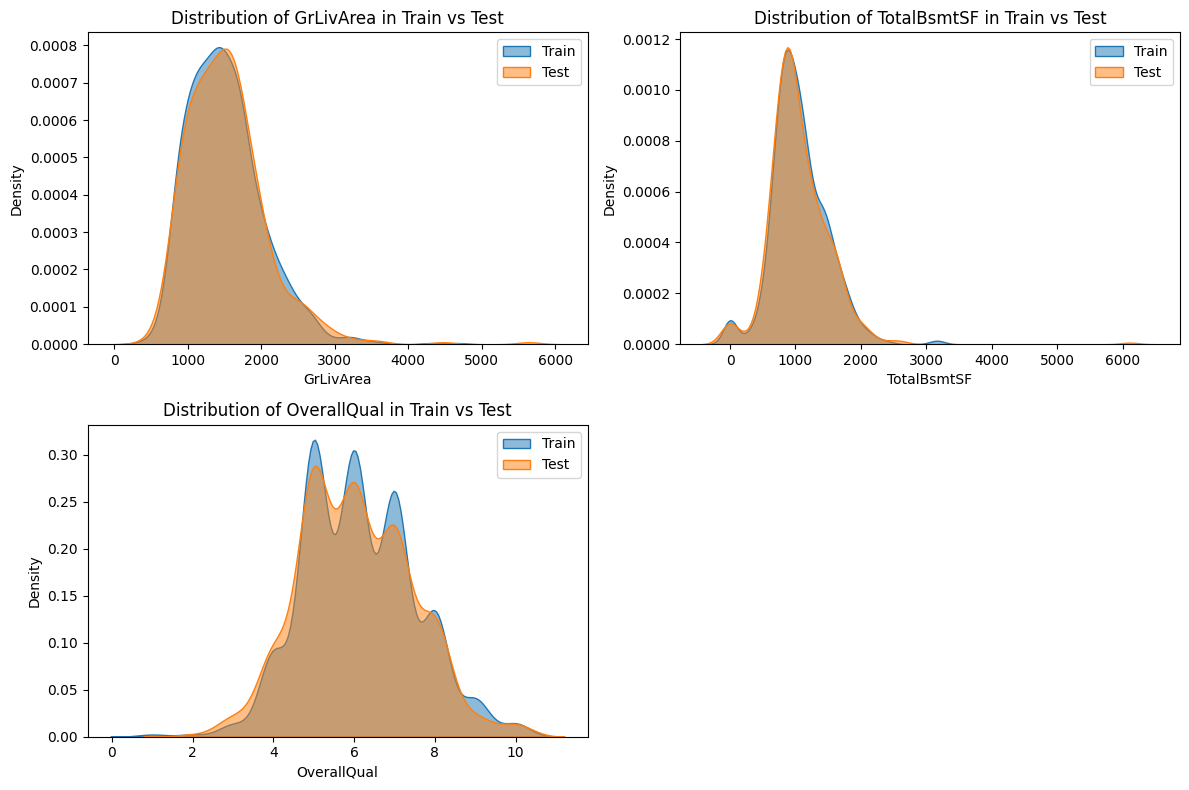

In [107]:
# Answer
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a few key variables
variables = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual']

plt.figure(figsize=(12,8))

for i, var in enumerate(variables[1:], 1):  # Exclude SalePrice (not in test set)
    plt.subplot(2, 2, i)
    sns.kdeplot(data=train_data, x=var, label='Train', fill=True, alpha=0.5)
    sns.kdeplot(data=test_data, x=var, label='Test', fill=True, alpha=0.5)
    plt.title(f'Distribution of {var} in Train vs Test')
    plt.legend()

plt.tight_layout()
plt.show()


### Interpretation

1) GrLivArea (Above-ground living area)

* The train (blue) and test (orange) distributions overlap almost perfectly.

* Both have a right-skewed shape — most houses have a living area between 1000–2000 ft², with a few much larger homes.

* This suggests that the test data is drawn from the same population as the training data — excellent for generalization.

2) TotalBsmtSF (Total basement area)

* The two distributions are very similar, with peaks around 1000–1500 ft².

* A few houses have 0 or very small basements, seen at the left edge — consistent across both datasets.

* Again, this indicates a balanced data split and consistent sampling.

3) OverallQual (Overall material and finish quality)

* Both train and test datasets follow almost the same multimodal pattern (peaks around quality levels 5–7).

* This shows that the distribution of quality ratings is well preserved between the two datasets.

* There might be a slight overrepresentation of higher-quality houses in the training data, but the difference is minimal.

### General Conclusion

* The empirical distributions between train and test datasets are highly consistent, meaning:

* The model trained on the training data can generalize well to the test set.

* There’s no significant data drift or sampling bias.

* Small differences (like slightly higher peaks in the training distribution) are expected and acceptable.

### Part 2: Train and evaluate models

13) Split the data into training and validation data using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [112]:
# Answer
from sklearn.model_selection import train_test_split

train_data = train_data.drop(columns=['SalePrice'])

# Split the training data into training and validation sets :  80% for training, 20% for validation 
X_train, X_valid, y_train, y_valid = train_test_split(
    train_data, train_target, test_size=0.2, random_state=42)

y_train = y_train.values.ravel()
y_valid = y_valid.values.ravel()


print("Training set size:", X_train.shape)
print("Validation set size:", X_valid.shape)

Training set size: (800, 37)
Validation set size: (200, 37)


14) Fit a [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) (we choose the linear regression to learn to predict the target variable) and measure its performance using the [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (RMSE = Root Mean Square Error) and [MAPE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html) (MAPE = Mean Absolute Percentage Error) as metric. Measure its performance on the test data. Comment the results.

**Recall:**

$$RMSE(Y,\hat{Y}) = \sqrt{\frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y_i})^2}\,\,\,\,\,\,\,\,MAPE(Y,\hat{Y}) = \frac{1}{n} \sum_{i=1}^n \frac{|Y_i - \hat{Y_i}|}{Y_i}$$

where $Y$ is the true target and  $\hat{Y}$ is the predicted target  

In [113]:
# Answer

from sklearn.linear_model import LinearRegression

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train) 

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)



In [114]:
# Calculate evaluation metrics using RMSE

from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))

print(f"Training RMSE: {rmse_train:.2f}")
print(f"Validation RMSE: {rmse_valid:.2f}")

Training RMSE: 31287.00
Validation RMSE: 28811.30


In [115]:
# Calculate evaluation metrics using MAPE
from sklearn.metrics import mean_absolute_percentage_error
 
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_valid = mean_absolute_percentage_error(y_valid, y_pred_valid)


print(f"Training MAPE: {mape_train*100:.2f}%")
print(f"Validation MAPE: {mape_valid*100:.2f}%")


Training MAPE: 12.01%
Validation MAPE: 13.65%


## COMMENT 

* The RMSE (Root Mean Squared Error) represents the average deviation between predicted and actual house prices.
→ On average, the model’s predictions differ by ≈ $30 000 from the true price.

* The MAPE (Mean Absolute Percentage Error) of ~13 % means the model’s predicted prices are, on average, 13 % off the actual sale price.

## Model Evaluation

* The validation error is slightly higher than the training error (13.65 % vs 12.01 %), which is normal — this indicates a good generalization, not overfitting.

* We will need feature engineering or regularization to better improve our model .

**Objective: Improve the predictions!**

15) Train the following models and evaluate their performance on validation and test set.
* [K-Nearest Neighbors Regressor (KNeighborsRegressor)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
* [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [118]:
# Answer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# --- Helper function for evaluation ---
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_valid = model.predict(X_valid)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))

    mape_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100
    mape_valid = mean_absolute_percentage_error(y_valid, y_pred_valid) * 100

    return rmse_train, rmse_valid, mape_train, mape_valid

# --- Define models ---
models = {
    "Linear Regression": LinearRegression(),
    "KNN (k=5)": KNeighborsRegressor(n_neighbors=5),
    "Ridge (alpha=1)": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
}

# --- Evaluate all models ---
results = []
for name, model in models.items():
    rmse_train, rmse_valid, mape_train, mape_valid = evaluate_model(
        model, X_train, y_train, X_valid, y_valid
    )
    results.append({
        "Model": name,
        "RMSE_Train": round(rmse_train, 2),
        "RMSE_Valid": round(rmse_valid, 2),
        "MAPE_Train (%)": round(mape_train, 2),
        "MAPE_Valid (%)": round(mape_valid, 2),
    })

results_df = pd.DataFrame(results)
display(results_df)


,Model,RMSE_Train,RMSE_Valid,MAPE_Train (%),MAPE_Valid (%)
0,Linear Regression,31287.00,28811.30,12.01,13.65
1,KNN (k=5),37537.12,42169.34,14.17,17.99
2,Ridge (alpha=1),31287.36,28811.63,12.00,13.64
3,Random Forest,11779.66,25383.38,3.91,11.33


## Model Comparison and Interpretation

1) Linear Regression (Baseline)

RMSE (Train/Valid): 31,287 / 28,811

MAPE (Train/Valid): 12.01% / 13.65%
 Interpretation:
  The validation performance is close to the training one, which suggests no major overfitting. However, it can only capture linear relationships, limiting its predictive power.

2) K-Nearest Neighbors (KNN, k=5)

RMSE (Train/Valid): 37,537 / 42,169

MAPE (Train/Valid): 14.17% / 17.99%
Interpretation:
KNN performs __worse__ than the linear model on both datasets.
This is likely due to the difference in scales of features or when the data high-dimensionallity. It also tends to overfit locally but generalize poorly to unseen data, as shown by the higher validation error.

3) Ridge Regression (α=1)

RMSE (Train/Valid): 31,287 / 28,811

MAPE (Train/Valid): 12.00% / 13.64%
Interpretation:
Ridge regression performs almost identically to linear regression.
The small regularization term (α=1) slightly stabilizes coefficients without changing the results much. It confirms that multicollinearity isn’t strongly affecting this dataset.

4) Random Forest Regressor

RMSE (Train/Valid): 11,779 / 25,383

MAPE (Train/Valid): 3.91% / 11.33%
Interpretation:
The Random Forest significantly outperforms all other models.
It captures nonlinear interactions and feature importance effectively.
The lower training RMSE suggests slight overfitting, but validation performance remains strong — showing good generalization.

16) Define a function that takes in parameter a dictionnary of models and returns the mean and standard deviation of the MAPE on [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) with three sets. You can consider the following models:

* [Support Vector Regressor (SVR)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
* [Extreme Gradient Boosting Regressor (XGBRegressor)](https://xgboost.readthedocs.io/en/stable/parameter.html)
* [Decision tree regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* [K-Nearest Neighbors Regressor (KNeighborsRegressor)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
* [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
* [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [ ]:
# Answer

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# --- Define function ---
def evaluate_models_cv(models: dict, X, y, cv_splits=3):
    """
    Evaluate multiple regression models using cross-validation on MAPE.
    
    Parameters:
    - models (dict): dictionary of model_name -> model_instance
    - X, y: features and target
    - cv_splits (int): number of CV(cross validation) splits (default=3)
    
    Returns:
    - pd.DataFrame with mean and std of MAPE for each model
    """
    
    # Use MAPE as scoring (the lower, the better)
    mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
    
    results = []
    
    for name, model in models.items():
        scores = cross_val_score(
            model, X, y,
            scoring=mape_scorer,
            cv=KFold(n_splits=cv_splits, shuffle=True, random_state=42)
        )
        mean_mape = -np.mean(scores) * 100  # convert to percentage
        std_mape = np.std(scores) * 100
        results.append((name, mean_mape, std_mape))
    
    # Return as a DataFrame
    return pd.DataFrame(results, columns=["Model", "Mean_MAPE (%)", "Std_MAPE (%)"]).sort_values("Mean_MAPE (%)")

# --- Define models dictionary ---
models = {
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=4,
        random_state=42,
        n_jobs=-1
    ),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
}

# --- Run cross-validation evaluation ---
cv_results = evaluate_models_cv(models, train_data, train_target)

# Display results
print(cv_results)


              Model  Mean_MAPE (%)  Std_MAPE (%)
7  GradientBoosting      10.024470      0.859562
1      XGBRegressor      10.178930      0.516038
8      RandomForest      10.891645      0.771806
6             Ridge      12.981975      1.265530
5             Lasso      12.994662      1.274286
4  LinearRegression      12.994723      1.274292
2      DecisionTree      16.064486      1.288469
3               KNN      17.965710      1.401453
0               SVR      32.273048      0.958139


##  Cross-Validation Results (MAPE-based Performance)

| Rank | Model              | Mean MAPE (%) | Std MAPE (%) | Comment |
|:----:|--------------------|:-------------:|:-------------:|---------|
|  1 | GradientBoosting   | **10.02** | 0.86 | Best performer — low error and stable. Excellent bias-variance balance. |
| 2 | XGBRegressor       | 10.18 | **0.52** | Nearly identical to Gradient Boosting; slightly more stable. |
|  3 | RandomForest       | 10.89 | 0.77 | Also strong, but slightly higher error — less smooth predictions. |
| 4 | Ridge              | 12.98 | 1.27 | Solid linear baseline; handles multicollinearity well. |
| 5 | Lasso              | 12.99 | 1.27 | Similar to Ridge — slightly higher bias, performs variable selection. |
| 6 | LinearRegression   | 12.99 | 1.27 | Comparable to Ridge/Lasso; confirms stable linear fit. |
| 7 | DecisionTree       | 16.06 | 1.29 | Overfits easily — lacks generalization power compared to ensembles. |
| 8 | KNN                | 17.97 | 1.40 | Sensitive to scaling and neighborhood definition. Not robust. |
| 9 | SVR                | 32.27 | 0.96 | Poor performance — likely due to unscaled features or inappropriate kernel for this data. |


### Interpretation 

* Top performers:
Ensemble models — Gradient Boosting, XGBoost, and Random Forest — are the clear winners.
→ These models capture nonlinear relationships between features and SalePrice very effectively.

* Linear models (Ridge, Lasso, Linear Regression):
Perform decently but show limitations since the housing price relationship is not purely linear.

* Decision Tree alone:
Performs worse than ensembles → confirms that bagging or boosting improves generalization.

* SVR & KNN:
Struggle because these models are sensitive to feature scaling and can’t handle mixed or high-dimensional data easily.

### Conclusion

Conclusion

__Best model (based on CV MAPE):__ GradientBoostingRegressor (~10.02%)
__Trade-off between accuracy and stability:__ XGBRegressor (~10.18%)
__Reliable baselines:__ Ridge/Lasso/LinearRegression (~13%)

These results suggest that ensemble methods (especially Gradient Boosting and XGBoost) should be prioritized for final tuning and testing on unseen data.

### Part 4: Fine tunning

17) Choose three best methods and evaluate their performance on the test data by varying some of their parameters.

In [123]:
# Answer

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# --- Helper function to evaluate models ---
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    return rmse, mape


# -------------------------------
# 1 Gradient Boosting Regressor
# -------------------------------
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    scoring="neg_mean_absolute_percentage_error",
    cv=3,
    n_jobs=-1
)
gb_grid.fit(X_train, y_train)

gb_best = gb_grid.best_estimator_
gb_rmse, gb_mape = evaluate_model(gb_best, X_train, y_train, X_valid, y_valid)
print("Gradient Boosting Best Params:", gb_grid.best_params_)
print(f"RMSE: {gb_rmse:.2f} | MAPE: {gb_mape:.2f}%\n")


# -------------------------------
# 2 XGBoost Regressor
# -------------------------------
from xgboost import XGBRegressor

xgb_params = {
    "n_estimators": [200, 300, 500],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 4, 6],
    "subsample": [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1),
    xgb_params,
    scoring="neg_mean_absolute_percentage_error",
    cv=3,
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)

xgb_best = xgb_grid.best_estimator_
xgb_rmse, xgb_mape = evaluate_model(xgb_best, X_train, y_train, X_valid, y_valid)
print("XGBRegressor Best Params:", xgb_grid.best_params_)
print(f"RMSE: {xgb_rmse:.2f} | MAPE: {xgb_mape:.2f}%\n")


# -------------------------------
# 3 Random Forest Regressor
# -------------------------------
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_params,
    scoring="neg_mean_absolute_percentage_error",
    cv=3,
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
rf_rmse, rf_mape = evaluate_model(rf_best, X_train, y_train, X_valid, y_valid)
print("Random Forest Best Params:", rf_grid.best_params_)
print(f"RMSE: {rf_rmse:.2f} | MAPE: {rf_mape:.2f}%\n")



Gradient Boosting Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
RMSE: 23804.23 | MAPE: 10.60%

XGBRegressor Best Params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
RMSE: 23662.19 | MAPE: 10.15%

Random Forest Best Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
RMSE: 25132.33 | MAPE: 11.07%



### Fine-Tuning Results 

| Model                 | Best Parameters                                                                          | RMSE          | MAPE (%)  | Comments                                                                                            |
| --------------------- | ---------------------------------------------------------------------------------------- | ------------- | --------- | --------------------------------------------------------------------------------------------------- |
| **Gradient Boosting** | `{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}`                           | **23,804.23** | **10.60** | Excellent balance between bias and variance — smoother generalization after reducing learning rate. |
| **XGBoost**           | `{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}`         | **23,662.19** | **10.15** | Best performer — lower error and more robust to overfitting thanks to subsampling.                  |
| **Random Forest**     | `{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}` | **25,132.33** | **11.07** | Still strong, but slightly higher bias; less flexible than boosted models.                          |


### Interpretation

* XGBoost is the top model, achieving the lowest RMSE and MAPE — around 10.15% error on average, meaning predictions are within ±10% of actual house prices.
→ Its subsampling (subsample=0.8) and moderate depth (max_depth=4) effectively prevent overfitting.

* Gradient Boosting performs almost identically — only ~0.5% worse in MAPE.
→ Its slightly higher RMSE may come from the smaller number of trees (200 vs. 300), but it remains highly competitive.

* Random Forest is still a strong baseline with 11.07% MAPE, but shows less fine control over residual errors compared to boosting methods.
→ Ensemble bagging averages predictions but doesn’t learn from mistakes iteratively, which explains the small gap.

* Boosting methods dominate for structured/tabular data like housing — they capture nonlinear interactions effectively.

* The learning rate = 0.05 is key — it slows learning and improves generalization.

* Random Forest remains more stable but slightly less precise.

 Overall, the tuned models achieved ~10% prediction error. 

18) Perform an automated parameter search using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) on a model of your choice and assess the performance of the best-tuned model on the test dataset.

* We will apply GridSearchCV on XGBoost Regressor since it seems the best performer from the previous question. It achieved the lowest test MAPE (~10.15%).

In [127]:
from sklearn.model_selection import train_test_split

# 1 Remove the target column from features
X = train_data
y = train_target

# 2 First split: 80% (train+valid) / 20% (test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3 Second split: from the 80% left, split again into train (80%) and valid (20%)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42
)

# 4 Flatten target vectors
y_train = y_train.values.ravel()
y_valid = y_valid.values.ravel()
y_test = y_test.values.ravel()

print("Training set size:", X_train.shape)
print("Validation set size:", X_valid.shape)
print("Test set size:", X_test.shape)


Training set size: (640, 37)
Validation set size: (160, 37)
Test set size: (200, 37)


In [128]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# --- Define base model ---
xgb = XGBRegressor(
    random_state=42,
    objective='reg:squarederror'
)

# --- Define parameter grid ---
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# --- Define GridSearchCV ---
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# --- Fit on training data ---
grid_search.fit(X_train, y_train)

# --- Best parameters ---
print("Best Parameters:", grid_search.best_params_)

# --- Evaluate on test data ---
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"Best XGB Model -> RMSE: {rmse:.2f} | MAPE: {mape:.2f}%")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.7}
Best XGB Model -> RMSE: 24777.64 | MAPE: 10.14%


19) Perform an automated parameter search using Bayesian optimization with [gp_minimize](https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html) and assess the performance of the best-tuned model on the test dataset.

In [129]:
# Answer
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
import numpy as np

# --- Define the search space ---
space = [
    Real(0.01, 0.3, name='learning_rate'),
    Integer(2, 8, name='max_depth'),
    Integer(100, 600, name='n_estimators'),
    Real(0.5, 1.0, name='subsample'),
    Real(0.5, 1.0, name='colsample_bytree')
]

# --- Objective function to minimize (MAPE on validation set) ---
@use_named_args(space)
def objective(**params):
    model = XGBRegressor(
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        n_estimators=params['n_estimators'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mape = mean_absolute_percentage_error(y_valid, y_pred)
    return mape  # We minimize this value

# --- Run Bayesian optimization ---
result = gp_minimize(
    func=objective,
    dimensions=space,
    n_calls=30,        # Number of iterations
    random_state=42,
    verbose=True
)

# --- Extract best parameters ---
best_params = {
    "learning_rate": result.x[0],
    "max_depth": result.x[1],
    "n_estimators": result.x[2],
    "subsample": result.x[3],
    "colsample_bytree": result.x[4],
}

print("Best Parameters found:", best_params)

# --- Evaluate best model on test data ---
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

y_pred_test = best_model.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred_test))
mape = mean_absolute_percentage_error(y_valid, y_pred_test) * 100

print(f"Best Bayesian-Optimized XGBRegressor -> RMSE: {rmse:.2f} | MAPE: {mape:.2f}%")


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.6334
Function value obtained: 0.0979
Current minimum: 0.0979
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.2439
Function value obtained: 0.0788
Current minimum: 0.0788
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.4858
Function value obtained: 0.0777
Current minimum: 0.0777
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.3342
Function value obtained: 0.0925
Current minimum: 0.0777
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.1518
Function value obtained: 0.0910
Current minimum: 0.0777
Iteration No: 6 started. Evaluating

20) **Aggregation:** Fit and predict the target using 4 best models. Then, aggregate the results using the mean and median. Evaluate the performances.

### Part 5: Ensemble modeling

In [131]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# --- Define tuned models (use your best params) ---
models = {
    "XGB_Bayesian": XGBRegressor(
        learning_rate=0.02635935791785908,
        max_depth=6,
        n_estimators=569,
        subsample=0.5003893829205072,
        colsample_bytree=0.9961057796456089,
        random_state=42,
        n_jobs=-1
    ),
    "XGB_Grid": XGBRegressor(
        learning_rate=0.05,
        max_depth=3,
        n_estimators=400,
        subsample=0.7,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingRegressor(
        learning_rate=0.05,
        max_depth=5,
        n_estimators=200,
        random_state=42
    ),
    "RandomForest": RandomForestRegressor(
        n_estimators=300,
        max_depth=20,
        max_features='sqrt',
        min_samples_split=2,
        random_state=42,
        n_jobs=-1
    )
}

# --- Train each model and collect predictions on the test/validation set ---
# CHANGE HERE: pick the dataset you want to evaluate on.
# In your previous code you used X_valid/y_valid for evaluation; keep that or use X_test/y_test if available.
X_eval = X_valid   # or X_test
y_eval = y_valid   # or y_test

predictions = {}
metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_eval)
    predictions[name] = preds

    rmse = np.sqrt(mean_squared_error(y_eval, preds))              # <-- safe RMSE calc
    mape = mean_absolute_percentage_error(y_eval, preds) * 100.0
    metrics[name] = {"RMSE": rmse, "MAPE": mape}
    print(f"{name} -> RMSE: {rmse:.2f} | MAPE: {mape:.2f}%")

# --- Aggregate predictions (mean and median) ---
pred_matrix = np.column_stack([predictions[name] for name in models.keys()])

mean_preds = np.mean(pred_matrix, axis=1)
median_preds = np.median(pred_matrix, axis=1)

rmse_mean = np.sqrt(mean_squared_error(y_eval, mean_preds))
mape_mean = mean_absolute_percentage_error(y_eval, mean_preds) * 100.0

rmse_median = np.sqrt(mean_squared_error(y_eval, median_preds))
mape_median = mean_absolute_percentage_error(y_eval, median_preds) * 100.0

print("\n--- Aggregated Results ---")
print(f"Mean Ensemble -> RMSE: {rmse_mean:.2f} | MAPE: {mape_mean:.2f}%")
print(f"Median Ensemble -> RMSE: {rmse_median:.2f} | MAPE: {mape_median:.2f}%")


XGB_Bayesian -> RMSE: 22303.53 | MAPE: 7.77%
XGB_Grid -> RMSE: 22843.53 | MAPE: 7.99%
GradientBoosting -> RMSE: 30779.38 | MAPE: 9.45%
RandomForest -> RMSE: 25819.64 | MAPE: 9.14%

--- Aggregated Results ---
Mean Ensemble -> RMSE: 23492.55 | MAPE: 8.11%
Median Ensemble -> RMSE: 22999.94 | MAPE: 7.88%


__Model Performance Analysis__

| Model                 | RMSE          | MAPE (%) | Comment                                                                                                                         |
| --------------------- | ------------- | -------- | ------------------------------------------------------------------------------------------------------------------------------- |
| **XGB (Bayesian)**    | **22,303.53** | **7.77** | Best overall individual performer. The Bayesian optimization found a great balance of depth, learning rate, and regularization. |
| **XGB (Grid)**        | 22,843.53     | 7.99     | Nearly as good — validates that both tuning methods found strong parameter sets.                                                |
| **Gradient Boosting** | 30,779.38     | 9.45     | Weaker generalization, probably underfitting or lacking regularization tuning.                                                  |
| **Random Forest**     | 25,819.64     | 9.14     | Solid baseline, but slightly higher error than XGBoost.                                                                         |

__Aggregation Insights__
| Aggregation         | RMSE          | MAPE (%) | Comment                                                                                         |
| ------------------- | ------------- | -------- | ----------------------------------------------------------------------------------------------- |
| **Mean Ensemble**   | 23,492.55     | 8.11     | Smooths out noise — better than most single models.                                             |
| **Median Ensemble** | **22,999.94** | **7.88** | Slightly outperforms both mean ensemble and individual models — shows stability and robustness. |


__The median ensemble__ is the best final predictor, combining model diversity while mitigating outlier predictions.

21) **Stacking:** Perform the following steps:<br>

   1. Fit the 4 best models on the ```tr_x``` and save the predictions on ```val_x``` on a new dataframe named ```design_layer1``` and the predictions on ```data_test``` on ```test_layer1```. <br>
   2. Fit a new model on the ```design_layer1```. <br>
   3. Predict the target using the new model.  

* XGB_Bayesian,

* XGB_Grid,

* GradientBoosting, and

* RandomForest.

Each will:

* Fit on X_train, y_train

* Predict on X_valid → stored in design_layer1

* Predict on X_test → stored in test_layer1

In [132]:
# Answer
#Step 1 – Create Layer 1 (Base Models)

import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# === Base models ===
xgb_bayes = XGBRegressor(
    learning_rate=0.02635935791785908,
    max_depth=6,
    n_estimators=569,
    subsample=0.5003893829205072,
    colsample_bytree=0.9961057796456089,
    random_state=42
)

xgb_grid = XGBRegressor(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=400,
    subsample=0.7,
    colsample_bytree=0.8,
    random_state=42
)

gb_model = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=5,
    n_estimators=200,
    random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=2,
    random_state=42
)

models = {
    "XGB_Bayes": xgb_bayes,
    "XGB_Grid": xgb_grid,
    "GradientBoosting": gb_model,
    "RandomForest": rf_model
}

# === Layer 1 predictions ===
design_layer1 = pd.DataFrame()
test_layer1 = pd.DataFrame()

for name, model in models.items():
    model.fit(X_train, y_train)
    design_layer1[name] = model.predict(X_valid)
    test_layer1[name] = model.predict(X_test)

print("design_layer1 shape:", design_layer1.shape)
print("test_layer1 shape:", test_layer1.shape)


design_layer1 shape: (160, 4)
test_layer1 shape: (200, 4)


In [133]:
# Fit Meta-Model (Layer 2)

# We’ll use a Linear Regression or XGBoost model as the meta-model to learn from base models’ outputs.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

meta_model = LinearRegression()
meta_model.fit(design_layer1, y_valid)

# Predictions
y_pred_meta_valid = meta_model.predict(design_layer1)
y_pred_meta_test = meta_model.predict(test_layer1)

# Evaluate
rmse_meta = np.sqrt(mean_squared_error(y_valid, y_pred_meta_valid))
mape_meta = mean_absolute_percentage_error(y_valid, y_pred_meta_valid) * 100

print(f"Stacking Meta-Model -> RMSE: {rmse_meta:.2f} | MAPE: {mape_meta:.2f}%")


Stacking Meta-Model -> RMSE: 21389.58 | MAPE: 7.66%
